In [2]:
%matplotlib inline
import pylab
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_validate,cross_val_score
from scipy.stats import lognorm, kurtosis, skew, probplot, kstest, ttest_ind,f_oneway
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.preprocessing import OneHotEncoder
import math


from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt # module for plotting 
from matplotlib import interactive, font_manager
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])
dark2_cmap=ListedColormap(dark2_colors)



def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 150

    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 16
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()



        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [4]:
# data location
localpath = ''
localpath = 'C://Users//Shaghayegh.kazemlou//Shay//Danaher//Microbiology//Data//'
filepath = 'C://Users//Shaghayegh.kazemlou//Shay//Danaher//Microbiology//Files//'

In [5]:
neg00=pd.read_csv(localpath+"All_neg.csv")
neg00.head()

C:\Users\Shaghayegh.kazemlou\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,17,293,294) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trackingID,testdate,SampleID,ID,strains,Org_Group,Organism_ID,anti,Drug,drug_index,drug_combine,Frzpanel,Drypanel,LPDG_MIC_2F,LPDG_DSI_2F,LPDG_MIC_2M,LPDG_DSI_2M,conc,Concentration,conc_No,wellbias,G_or_I,AreaSUM_Cycle_2,AreaSUM_Cycle_3,AreaSUM_Cycle_4,AreaSUM_Cycle_5,AreaSUM_Cycle_6,AreaSUM_Cycle_7,AreaSUM_Cycle_8,AreaSUM_Cycle_9,AreaSUM_Cycle_10,AreaSUM_Cycle_11,AreaSUM_Cycle_12,AreaSUM_Cycle_13,AreaSUM_Cycle_14,AreaSUM_Cycle_15,PerimMean_Cycle_2,PerimMean_Cycle_3,PerimMean_Cycle_4,PerimMean_Cycle_5,PerimMean_Cycle_6,PerimMean_Cycle_7,PerimMean_Cycle_8,PerimMean_Cycle_9,PerimMean_Cycle_10,PerimMean_Cycle_11,PerimMean_Cycle_12,PerimMean_Cycle_13,PerimMean_Cycle_14,PerimMean_Cycle_15,...,Rate_BacCount_Cy7vsCy6,Rate_BacCount_Cy8vsCy7,Rate_BacCount_Cy9vsCy8,Rate_BacCount_Cy10vsCy9,Rate_BacCount_Cy11vsCy10,Rate_BacCount_Cy12vsCy11,Rate_BacCount_Cy13vsCy12,Rate_BacCount_Cy14vsCy13,Rate_BacCount_Cy15vsCy14,Rate_Area_GvsD_Cy4,Rate_Area_GvsD_Cy5,Rate_Area_GvsD_Cy6,Rate_Area_GvsD_Cy7,Rate_Area_GvsD_Cy8,Rate_Area_GvsD_Cy9,Rate_Area_GvsD_Cy10,Rate_Area_GvsD_Cy11,Rate_Area_GvsD_Cy12,Rate_Area_GvsD_Cy13,Rate_Area_GvsD_Cy14,Rate_BacCount_GvsD_Cy2,Rate_BacCount_GvsD_Cy3,Rate_BacCount_GvsD_Cy4,Rate_BacCount_GvsD_Cy5,Rate_BacCount_GvsD_Cy6,Rate_BacCount_GvsD_Cy7,Rate_BacCount_GvsD_Cy8,Rate_BacCount_GvsD_Cy9,Rate_BacCount_GvsD_Cy10,Rate_BacCount_GvsD_Cy11,Rate_BacCount_GvsD_Cy12,Rate_BacCount_GvsD_Cy13,Rate_BacCount_GvsD_Cy14,Rate_Area_BacCount_Cy2,Rate_Area_BacCount_Cy3,Rate_Area_BacCount_Cy4,Rate_Area_BacCount_Cy5,Rate_Area_BacCount_Cy6,Rate_Area_BacCount_Cy7,Rate_Area_BacCount_Cy8,Rate_Area_BacCount_Cy9,Rate_Area_BacCount_Cy10,Rate_Area_BacCount_Cy11,Rate_Area_BacCount_Cy12,Rate_Area_BacCount_Cy13,Rate_Area_BacCount_Cy14,Dry_Growth_Pattern,Dry_Growth_Strength,drugcode,GI
0,0,20180724,10_50241,50241,A.BAUMANNII,NEG,71,AS,Ampicillin/Sulbactam,1,b,JFSN2F,JFSN2D,16/8,6,16/8,6,0.5/0.25,0.5,1,-5,G,27101.894,30706.331,40497.462,72978.205,187658.465,430169.064,529126.616,561254.217,576701.647,582257.974,586606.079,588559.637,589819.637,590280.383,14.906538,15.423570,16.556296,20.460558,36.782275,84.683908,306.629000,1354.753000,3633.388000,3502.197000,3365.422000,3290.571000,3235.660000,3281.725000,...,1.200924,0.359217,0.168168,0.092888,0.072765,0.079667,0.076544,0.040091,0.042534,0.960319,0.957059,0.966725,0.982470,1.017562,1.009941,1.012928,1.008266,1.005656,1.002860,1.002949,0.781731,0.780822,0.875166,0.974426,1.076084,1.183281,1.290316,1.237691,1.250949,1.251715,1.220727,1.176770,1.173738,7.196467,7.647903,10.756298,15.951520,24.077299,25.076895,22.693713,20.606316,19.373859,18.233739,17.014418,15.857302,15.278718,NaN,NaN,AS,1
1,1,20180724,10_50241,50241,A.BAUMANNII,NEG,71,AS,Ampicillin/Sulbactam,1,b,JFSN2F,JFSN2D,16/8,6,16/8,6,1/0.5,1.0,2,-4,G,21542.829,26216.352,35438.045,76848.397,210919.649,424311.600,525144.989,565128.127,580313.343,584653.949,586999.457,589276.882,590874.199,592408.908,15.326497,15.681645,17.124328,24.154123,53.129892,142.425321,462.888231,813.777200,3614.894000,3346.861000,3347.768000,3324.871000,3307.702000,3272.671000,...,0.988239,0.401552,0.179621,0.175921,0.104793,0.069173,0.073629,0.065962,0.093654,1.097422,0.908860,0.860110,0.996032,1.025278,1.003018,1.006624,1.004134,1.004982,1.001639,1.001159,1.378923,1.331210,1.195573,1.162754,1.281045,1.559345,1.649035,1.566423,1.471411,1.429629,1.407922,1.360909,1.324457,10.090318,11.132209,12.858507,20.043922,32.216229,32.596727,28.784531,26.259380,22.930942,20.911118,19.636686,18.360967,17.271468,NaN,NaN,AS,1
2,2,20180724,10_50241,50241,A.BAUMANNII,NEG,71,AS,Ampicillin/Sulbactam,1,b,JFSN2F,JFSN2D,16/8,6,16/8,6,2020-02-01 00:00:00,2.0,3,-3,G,9492.367,21206.577,32263.642,75590.197,174958.406,293052.680,403847.022,500362.903,555413.776,574628.231,583394.307,579776.302,589994.365,591729.275,18.712269,15.354304,17.419314,27.283791,53.273801,121.420147,93.508771,168.450500,746.132333,1859.729500,3487.894000,3446.500000,3279.092000,3250.854000,...,0.366804,0.441463,0.427158,0.317

In [6]:
neg = neg00.copy()
neg['bug_drug']=neg.apply(lambda row:  str(row['SampleID'])+'_'
                              +str(row['testdate'])+'_'+str(row['drug_index']), axis=1)
neg['strain'] = neg['strains']
neg['conc'] = neg['Concentration']
neg.sort_values(by =['ID','drug_index','Concentration'], axis=0, ascending=True, inplace=True)
neg.loc[:,['testdate','trackingID','bug_drug', 'ID','drug_index','Concentration','GI']][0:50].head()

,testdate,trackingID,bug_drug,ID,drug_index,Concentration,GI
59875,20200602,59875,269B_20200602_1,269,1,0.5,1
59968,20200602,59968,269M_20200602_1,269,1,0.5,1
59876,20200602,59876,269B_20200602_1,269,1,1.0,1
59969,20200602,59969,269M_20200602_1,269,1,1.0,1
59877,20200602,59877,269B_20200602_1,269,1,2.0,1


In [7]:
neg['bug_type'] = 'bug_type_B'
neg.ix[neg.strains.isin(['P.AERUGINOSA', 'A.BAUMANNII']),'bug_type'] = 'bug_type_A'

neg['drug_type'] = 'drug_type_B'
neg.loc[neg.anti.isin(['CAZ', 'CFPM', 'CTX', 'IPM', 'MEPM']),'drug_type'] = 'drug_type_A'
len(neg)

78563

In [8]:
neg = neg[neg.anti!='ST']
len(neg)

74219

In [10]:
neg['strain'] = neg['strains']
neg['conc'] = neg['Concentration']
len(neg.bug_drug.unique()),len(neg)

(9380, 74219)

In [11]:
usecols=[ 'trackingID',
         'strain','SampleID','anti','conc',    
         'GI','drugcode',
         'Concentration',      
        'strains',
         'ID','drug_type','bug_type',
         'bug_drug',
                  
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9',
#          'AreaSUM_Cycle_10',
#          'AreaSUM_Cycle_11',
#          'AreaSUM_Cycle_12',
#          'AreaSUM_Cycle_13',
#          'AreaSUM_Cycle_14',
#          'AreaSUM_Cycle_15',
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
#          'BacCount_Cycle_10',
#          'BacCount_Cycle_11',
#          'BacCount_Cycle_12',
#          'BacCount_Cycle_13',
#          'BacCount_Cycle_14',
#          'BacCount_Cycle_15',
         'Growth_AreaSUM_Cycle_2',
         'Growth_AreaSUM_Cycle_3',
         'Growth_AreaSUM_Cycle_4',
         'Growth_AreaSUM_Cycle_5',
         'Growth_AreaSUM_Cycle_6',
         'Growth_AreaSUM_Cycle_7',
         'Growth_AreaSUM_Cycle_8',
         'Growth_AreaSUM_Cycle_9',
#          'Growth_AreaSUM_Cycle_10',
#          'Growth_AreaSUM_Cycle_11',
#          'Growth_AreaSUM_Cycle_12',
#          'Growth_AreaSUM_Cycle_13',
#          'Growth_AreaSUM_Cycle_14',
#          'Growth_AreaSUM_Cycle_15',
         'Growth_BacCount_Cycle_2',
         'Growth_BacCount_Cycle_3',
         'Growth_BacCount_Cycle_4',
         'Growth_BacCount_Cycle_5',
         'Growth_BacCount_Cycle_6',
         'Growth_BacCount_Cycle_7',
         'Growth_BacCount_Cycle_8',
         'Growth_BacCount_Cycle_9',
#          'Growth_BacCount_Cycle_10',
#          'Growth_BacCount_Cycle_11',
#          'Growth_BacCount_Cycle_12',
#          'Growth_BacCount_Cycle_13',
#          'Growth_BacCount_Cycle_14',
#          'Growth_BacCount_Cycle_15',
    
    
#        'Rate_Area_Cy4vsCy3',
#        'Rate_Area_Cy3vsCy2',
#         'Rate_Area_Cy5vsCy4',
#         'Rate_Area_Cy6vsCy5',
#         'Rate_Area_Cy7vsCy6',
#         'Rate_Area_Cy8vsCy7',
#         'Rate_Area_Cy9vsCy8',
 #        'Rate_Area_Cy10vsCy9',
#          'Rate_Area_Cy11vsCy10',
#          'Rate_Area_Cy12vsCy11',
#          'Rate_Area_Cy13vsCy12',
#          'Rate_Area_Cy14vsCy13',
#          'Rate_Area_Cy15vsCy14',
#         'Rate_BacCount_Cy3vsCy2',
#         'Rate_BacCount_Cy4vsCy3',
#         'Rate_BacCount_Cy5vsCy4',
#         'Rate_BacCount_Cy6vsCy5',
#         'Rate_BacCount_Cy7vsCy6',
#         'Rate_BacCount_Cy8vsCy7',
#         'Rate_BacCount_Cy9vsCy8',
#         'Rate_BacCount_Cy10vsCy9',
#          'Rate_BacCount_Cy11vsCy10',
#          'Rate_BacCount_Cy12vsCy11',
#          'Rate_BacCount_Cy13vsCy12',
#          'Rate_BacCount_Cy14vsCy13',
#          'Rate_BacCount_Cy15vsCy14',
    
        'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
       'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
       'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
          'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ]

#choose which columns to use #pos & neg
#pos2=pos[usecols].copy()
neg2=neg[usecols].copy()
neg2.head()

,trackingID,strain,SampleID,anti,conc,GI,drugcode,Concentration,strains,ID,drug_type,bug_type,bug_drug,AreaSUM_Cycle_2,AreaSUM_Cycle_3,AreaSUM_Cycle_4,AreaSUM_Cycle_5,AreaSUM_Cycle_6,AreaSUM_Cycle_7,AreaSUM_Cycle_8,AreaSUM_Cycle_9,BacCount_Cycle_2,BacCount_Cycle_3,BacCount_Cycle_4,BacCount_Cycle_5,BacCount_Cycle_6,BacCount_Cycle_7,BacCount_Cycle_8,BacCount_Cycle_9,Growth_AreaSUM_Cycle_2,Growth_AreaSUM_Cycle_3,Growth_AreaSUM_Cycle_4,Growth_AreaSUM_Cycle_5,Growth_AreaSUM_Cycle_6,Growth_AreaSUM_Cycle_7,Growth_AreaSUM_Cycle_8,Growth_AreaSUM_Cycle_9,Growth_BacCount_Cycle_2,Growth_BacCount_Cycle_3,Growth_BacCount_Cycle_4,Growth_BacCount_Cycle_5,Growth_BacCount_Cycle_6,Growth_BacCount_Cycle_7,Growth_BacCount_Cycle_8,Growth_BacCount_Cycle_9,PerimMean_Cycle_2,PerimMean_Cycle_3,PerimMean_Cycle_4,PerimMean_Cycle_5,PerimMean_Cycle_6,PerimMean_Cycle_7,PerimMean_Cycle_8,PerimMean_Cycle_9,CircMean_Cycle_2,CircMean_Cycle_3,CircMean_Cycle_4,CircMean_Cycle_5,CircMean_Cycle_6,CircMean_Cycle_7,CircMean_Cycle_8,CircMean_Cycle_9,RoundMean_Cycle_2,RoundMean_Cycle_3,RoundMean_Cycle_4,RoundMean_Cycle_5,RoundMean_Cycle_6,RoundMean_Cycle_7,RoundMean_Cycle_8,RoundMean_Cycle_9,SolidityMean_Cycle_2,SolidityMean_Cycle_3,SolidityMean_Cycle_4,SolidityMean_Cycle_5,SolidityMean_Cycle_6,SolidityMean_Cycle_7,SolidityMean_Cycle_8,SolidityMean_Cycle_9,LumiMean_Cycle_2,LumiMean_Cycle_3,LumiMean_Cycle_4,LumiMean_Cycle_5,LumiMean_Cycle_6,LumiMean_Cycle_7,LumiMean_Cycle_8,LumiMean_Cycle_9
59875,59875,K.PNEUMONIAE,269B,AS,0.5,1,AS,0.5,K.PNEUMONIAE,269,drug_type_B,bug_type_B,269B_20200602_1,13892.253,16349.872,18575.641,36394.523,106799.055,309325.175,538844.772,583319.202,234,226,298,580,1318,2813,7867,15158,7572.964,6894.410,9039.234,26512.821,73186.129,190295.585,389065.535,562003.481,300,129,163,438,1096,1792,3647,9872,37.875068,34.641003,29.154378,24.578304,28.346360,65.357961,99.565139,3348.827000,0.625856,0.678534,0.733114,0.789878,0.768034,0.693742,0.759582,0.654000,0.702164,0.728578,0.727348,0.737968,0.705047,0.666140,0.704506,0.839,0.789820,0.817149,0.841495,0.877832,0.875979,0.844412,0.874165,0.977000,93.40,93.48,93.13,92.23,89.94,83.27,72.61,65.86
59968,59968,K.PNEUMONIAE,269M,AS,0.5,1,AS,0.5,K.PNEUMONIAE,269,drug_type_B,bug_type_B,269M_20200602_1,10939.116,13882.722,23351.766,51385.753,137401.318,340655.549,549386.586,587444.729,272,279,436,857,1567,3222,7928,16040,24032.458,7655.573,10778.316,28237.258,74565.379,165776.202,319817.712,514565.923,409,176,175,508,1060,1761,2737,6393,29.417071,27.061174,23.847026,23.573058,30.137174,63.867673,158.182373,3415.272000,0.720056,0.753731,0.788823,0.812085,0.756050,0.696073,0.680333,0.633000,0.750317,0.759330,0.753401,0.735158,0.687422,0.662845,0.652255,0.840,0.834663,0.851263,0.871629,0.889993,0.870497,0.844570,0.836882,0.983000,94.20,94.21,93.67,92.65,89.55,82.86,72.13,63.44
59876,59876,K.PNEUMONIAE,269B,AS,1.0,1,AS,1.0,K.PNEUMONIAE,269,drug_type_B,bug_type_B,269B_20200602_1,13357.471,17305.766,19609.970,38131.696,104975.002,289492.136,536035.187,584983.767,266,203,207,572,1176,2261,7321,15438,7572.964,6894.410,9039.234,26512.821,73186.129,190295.585,389065.535,562003.481,300,129,163,438,1096,1792,3647,9872,39.652119,36.806411,31.799358,25.271067,28.559396,63.614064,328.271353,3331.332000,0.687567,0.658623,0.710970,0.774492,0.754636,0.665209,0.755118,0.662000,0.748634,0.706020,0.714426,0.721334,0.703324,0.658653,0.738471,0.839,0.820155,0.806835,0.833380,0.871333,0.867908,0.830101,0.879412,0.979000,92.49,92.23,92.02,91.27,89.04,83.04,73.29,64.75
59969,59969,K.PNEUMONIAE,269M,AS,1.0,1,AS,1.0,K.PNEUMONIAE,269,drug_type_B,bug_type_B,269M_20200602_1,14171.476,17026.047,20603.352,45247.013,121345.926,312757.254,540089.541,586154.498,235,232,332,630,1422,2658,7170,15133,24032.458,7655.573,10778.316,28237.258,74565.379,165776.202,319817.712,514565.923,409,176,175,508,1060,1761,2737,6393,32.419498,28.940832,22.794774,23.124172,28.380355,68.768484,160.863044,3387.204000,0.657844,0.671695,0.761872,0.794465,0.759271,0.683837,0

In [12]:
#cratea rate of increase for areasome and bac count
#AreaSum
keepcols6=[]
for i in range(2,9):
    colname='Rate_Area_Cy'+ str(i+1)+'vsCy'+str(i)
    keepcols6.append(colname)
    fbig='AreaSUM_Cycle_'+str(i+1)
    fsmol='AreaSUM_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]
    
#Count
keepcols7=[]
for i in range(2,9):
    colname='Rate_BacCount_Cy'+ str(i+1)+'vsCy'+str(i)
    keepcols7.append(colname)
    fbig='BacCount_Cycle_'+str(i+1)
    fsmol='BacCount_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]
    
    

#cratea rate of increase for growth columns #neg
#AreaSum
keepcols3=[]
for i in range(2,9):
    colname='Rate_Area_GCy'+ str(i+1)+'vsCy'+str(i)
    keepcols3.append(colname)
    fbig='Growth_AreaSUM_Cycle_'+str(i+1)
    fsmol='Growth_AreaSUM_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]

#Count
keepcols4=[]
for i in range(2,9):
    colname='Rate_BacCount_GCy'+ str(i+1)+'vsCy'+str(i)
    keepcols4.append(colname)
    fbig='Growth_BacCount_Cycle_'+str(i+1)
    fsmol='Growth_BacCount_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]


#cratea ratio of growth to drug for all rate columns #neg
#AreaSum
keepcols1=[]    
for i in range(2,9):
    colname='Ratio_Area_GvsD_GCy'+ str(i+1)+'vsCy'+str(i)
    keepcols1.append(colname)
    fgrowth='Rate_Area_GCy'+ str(i+1)+'vsCy'+str(i)
    fdrug='Rate_Area_Cy'+ str(i+1)+'vsCy'+str(i)
    neg2[colname]=neg2[fgrowth]/neg2[fdrug]
    
#Count   
keepcols2=[]
for i in range(2,9):
    colname='Ratio_BacCount_GvsD_Cy'+ str(i+1)+'vsCy'+str(i)
    keepcols2.append(colname)
    fgrowth='Rate_BacCount_GCy'+ str(i+1)+'vsCy'+str(i)
    fdrug='Rate_BacCount_Cy'+ str(i+1)+'vsCy'+str(i)
    neg2[colname]=neg2[fgrowth]/neg2[fdrug]
    

keepcols5=[]
for i in range(6,10):
    colname= 'Slope_Area_G' +  str(i)
    keepcols5.append(colname)
    value='Growth_AreaSUM_Cycle_'+str(i)
    previousvalue='Growth_AreaSUM_Cycle_'+str(i-1)
    neg2[colname]=(neg2[value]-neg2[previousvalue])/(neg2['Growth_AreaSUM_Cycle_3']-neg2['Growth_AreaSUM_Cycle_2'])

In [15]:
#which columns to use for modeling
generalcols=['trackingID','GI','drugcode','Concentration','ID','drug_type','bug_type',
             'bug_drug','strains',
            'strain','SampleID','anti','conc']
datacolumns = ['AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
        'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
       'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
       'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
          'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ]

main_cols=generalcols+datacolumns+keepcols1+keepcols2+keepcols3+keepcols4+keepcols5+keepcols6+keepcols7

#separate dataset for modeling #pos & neg
neg3=neg2[main_cols].copy()

model_data_neg=neg3.copy()

model_data_neg.head()


,trackingID,GI,drugcode,Concentration,ID,drug_type,bug_type,bug_drug,strains,strain,SampleID,anti,conc,AreaSUM_Cycle_2,AreaSUM_Cycle_3,AreaSUM_Cycle_4,AreaSUM_Cycle_5,AreaSUM_Cycle_6,AreaSUM_Cycle_7,AreaSUM_Cycle_8,AreaSUM_Cycle_9,BacCount_Cycle_2,BacCount_Cycle_3,BacCount_Cycle_4,BacCount_Cycle_5,BacCount_Cycle_6,BacCount_Cycle_7,BacCount_Cycle_8,BacCount_Cycle_9,PerimMean_Cycle_2,PerimMean_Cycle_3,PerimMean_Cycle_4,PerimMean_Cycle_5,PerimMean_Cycle_6,PerimMean_Cycle_7,PerimMean_Cycle_8,PerimMean_Cycle_9,CircMean_Cycle_2,CircMean_Cycle_3,CircMean_Cycle_4,CircMean_Cycle_5,CircMean_Cycle_6,CircMean_Cycle_7,CircMean_Cycle_8,CircMean_Cycle_9,RoundMean_Cycle_2,RoundMean_Cycle_3,RoundMean_Cycle_4,RoundMean_Cycle_5,RoundMean_Cycle_6,...,LumiMean_Cycle_6,LumiMean_Cycle_7,LumiMean_Cycle_8,LumiMean_Cycle_9,Ratio_Area_GvsD_GCy3vsCy2,Ratio_Area_GvsD_GCy4vsCy3,Ratio_Area_GvsD_GCy5vsCy4,Ratio_Area_GvsD_GCy6vsCy5,Ratio_Area_GvsD_GCy7vsCy6,Ratio_Area_GvsD_GCy8vsCy7,Ratio_Area_GvsD_GCy9vsCy8,Ratio_BacCount_GvsD_Cy3vsCy2,Ratio_BacCount_GvsD_Cy4vsCy3,Ratio_BacCount_GvsD_Cy5vsCy4,Ratio_BacCount_GvsD_Cy6vsCy5,Ratio_BacCount_GvsD_Cy7vsCy6,Ratio_BacCount_GvsD_Cy8vsCy7,Ratio_BacCount_GvsD_Cy9vsCy8,Rate_Area_GCy3vsCy2,Rate_Area_GCy4vsCy3,Rate_Area_GCy5vsCy4,Rate_Area_GCy6vsCy5,Rate_Area_GCy7vsCy6,Rate_Area_GCy8vsCy7,Rate_Area_GCy9vsCy8,Rate_BacCount_GCy3vsCy2,Rate_BacCount_GCy4vsCy3,Rate_BacCount_GCy5vsCy4,Rate_BacCount_GCy6vsCy5,Rate_BacCount_GCy7vsCy6,Rate_BacCount_GCy8vsCy7,Rate_BacCount_GCy9vsCy8,Slope_Area_G6,Slope_Area_G7,Slope_Area_G8,Slope_Area_G9,Rate_Area_Cy3vsCy2,Rate_Area_Cy4vsCy3,Rate_Area_Cy5vsCy4,Rate_Area_Cy6vsCy5,Rate_Area_Cy7vsCy6,Rate_Area_Cy8vsCy7,Rate_Area_Cy9vsCy8,Rate_BacCount_Cy3vsCy2,Rate_BacCount_Cy4vsCy3,Rate_BacCount_Cy5vsCy4,Rate_BacCount_Cy6vsCy5,Rate_BacCount_Cy7vsCy6,Rate_BacCount_Cy8vsCy7,Rate_BacCount_Cy9vsCy8
59875,59875,1,AS,0.5,269,drug_type_B,bug_type_B,269B_20200602_1,K.PNEUMONIAE,K.PNEUMONIAE,269B,AS,0.5,13892.253,16349.872,18575.641,36394.523,106799.055,309325.175,538844.772,583319.202,234,226,298,580,1318,2813,7867,15158,37.875068,34.641003,29.154378,24.578304,28.346360,65.357961,99.565139,3348.827000,0.625856,0.678534,0.733114,0.789878,0.768034,0.693742,0.759582,0.654000,0.702164,0.728578,0.727348,0.737968,0.705047,...,89.94,83.27,72.61,65.86,-0.506497,2.285224,2.015180,0.910014,0.843819,1.407724,5.385435,16.672500,0.827304,1.782839,1.180656,0.559852,0.576156,1.841729,-0.089602,0.311096,1.933083,1.760405,1.600159,1.044533,0.444496,-0.570000,0.263566,1.687117,1.502283,0.635036,1.035156,1.706882,-68.783484,-172.586789,-292.931661,-254.862466,0.176906,0.136134,0.959261,1.934482,1.896329,0.742001,0.082537,-0.034188,0.318584,0.946309,1.272414,1.134294,1.796658,0.926783
59968,59968,1,AS,0.5,269,drug_type_B,bug_type_B,269M_20200602_1,K.PNEUMONIAE,K.PNEUMONIAE,269M,AS,0.5,10939.116,13882.722,23351.766,51385.753,137401.318,340655.549,549386.586,587444.729,272,279,436,857,1567,3222,7928,16040,29.417071,27.061174,23.847026,23.573058,30.137174,63.867673,158.182373,3415.272000,0.720056,0.753731,0.788823,0.812085,0.756050,0.696073,0.680333,0.633000,0.750317,0.759330,0.753401,0.735158,0.687422,...,89.55,82.86,72.13,63.44,-2.532420,0.598036,1.349279,0.980139,0.826914,1.516506,8.790254,-22.136221,-0.010097,1.970655,1.311589,0.626157,0.379458,1.305471,-0.681449,0.407905,1.619821,1.640674,1.223233,0.929214,0.608935,-0.569682,-0.005682,1.902857,1.086614,0.661321,0.554231,1.335769,-2.828873,-5.569485,-9.406032,-11.891652,0.269090,0.682074,1.200508,1.673919,1.479274,0.612733,0.069274,0.025735,0.562724,0.965596,0.828471,1.056158,1.460583,1.023209
59876,59876,1,AS,1.0,269,drug_type_B,bug_type_B,269B_20200602_1,K.PNEUMONIAE,K.PNEUMONIAE,269B,AS,1.0,13357.471,17305.766,19609.970,38131.696,104975.002,289492.136,536035.187,584983.767,266,203,207,572,1176,2261,7321,15438,39.652119,36.806411,31.799358,25.271067,28.559396,63.614064,328.271353,3331.332000,0.687567,0.658623,0.710970,0.774492,0.754636,0.665209,0.755118,0.662000,0.748634,0.70

In [17]:
#eliminate missing and inf values 
#neg
model_data_neg = model_data_neg.replace([np.inf,-np.inf], np.nan)
model_data_neg.dropna(inplace=True)


In [16]:
#choose feature set and target 
features = ['Concentration', 
        'Ratio_Area_GvsD_GCy3vsCy2',
        'Ratio_Area_GvsD_GCy4vsCy3', 'Ratio_Area_GvsD_GCy5vsCy4',
        'Ratio_Area_GvsD_GCy6vsCy5', 'Ratio_Area_GvsD_GCy7vsCy6',
        'Ratio_Area_GvsD_GCy8vsCy7', 'Ratio_Area_GvsD_GCy9vsCy8',
            
        'Ratio_BacCount_GvsD_Cy3vsCy2', 'Ratio_BacCount_GvsD_Cy4vsCy3',
        'Ratio_BacCount_GvsD_Cy5vsCy4', 'Ratio_BacCount_GvsD_Cy6vsCy5',
        'Ratio_BacCount_GvsD_Cy7vsCy6', 'Ratio_BacCount_GvsD_Cy8vsCy7',
        'Ratio_BacCount_GvsD_Cy9vsCy8', 
            
        'Rate_Area_GCy3vsCy2',
        'Rate_Area_GCy4vsCy3', 'Rate_Area_GCy5vsCy4', 'Rate_Area_GCy6vsCy5',
        'Rate_Area_GCy7vsCy6', 'Rate_Area_GCy8vsCy7', 'Rate_Area_GCy9vsCy8',

        'Rate_BacCount_GCy3vsCy2', 'Rate_BacCount_GCy4vsCy3',
        'Rate_BacCount_GCy5vsCy4', 'Rate_BacCount_GCy6vsCy5',
        'Rate_BacCount_GCy7vsCy6', 'Rate_BacCount_GCy8vsCy7',
        'Rate_BacCount_GCy9vsCy8', 
            
            
        'Rate_Area_Cy3vsCy2',
        'Rate_Area_Cy4vsCy3',
        'Rate_Area_Cy5vsCy4',
         'Rate_Area_Cy6vsCy5',
         'Rate_Area_Cy7vsCy6',
         'Rate_Area_Cy8vsCy7',
         'Rate_Area_Cy9vsCy8',

         'Rate_BacCount_Cy3vsCy2',
         'Rate_BacCount_Cy4vsCy3',
         'Rate_BacCount_Cy5vsCy4',
         'Rate_BacCount_Cy6vsCy5',
         'Rate_BacCount_Cy7vsCy6',
         'Rate_BacCount_Cy8vsCy7',
         'Rate_BacCount_Cy9vsCy8',
  
            
        'Slope_Area_G6','Slope_Area_G7', 'Slope_Area_G8', 'Slope_Area_G9',
           
         'bug_type_A','bug_type_B','drug_type_A', 'drug_type_B',
            
        'A.BAUMANNII', 'C.FREUNDII', 'E.AEROGENES', 'E.CLOACAE', 'E.COLI', 'K.OXYTOCA', 
        'K.PNEUMONIAE', 'P.AERUGINOSA', 'P.MIRABILIS', 'P.RETTGERI', 'P.VULGARIS', 'S.MARCESCENS',
           
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
         'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
         'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
         'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
          'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ]
       
target= 'GI'
#target= 'MIC'

len(features)

119

In [18]:
# run the model for gram pos data
onemodel_n=[]
onemodel_f1_results_train=[]
onemodel_f1_results_test=[]
onemodel_auc_results=[]
roc_df_big=pd.DataFrame()

n=20
dfgram=neg2
originaldf=neg


# model with independant train test split with each drug one hot encoded
model_data4=model_data_neg

model_data4 = model_data4.replace([np.inf,-np.inf], np.nan)
model_data4.dropna(inplace=True)
# generate binary values using get_dummies
df1=model_data4.copy()

#df = pd.get_dummies(df1, columns=["bug_type","drug_type"], prefix=[None, None] )
dff = pd.get_dummies(df1, columns=["strains","bug_type","drug_type"], prefix=[None, None,None] )

In [19]:
len(dff.bug_drug.unique()),len(dff)

(9380, 73342)

In [20]:
df=dff.groupby("bug_drug").filter(lambda x: len(x) > 7)
len(df.bug_drug.unique()),len(df)

(7816, 62528)

In [21]:
df_deleted=dff.groupby("bug_drug").filter(lambda x: len(x) <=7)
len(df_deleted.bug_drug.unique()),len(df_deleted)

(1564, 10814)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

normalfeatures =  ['Concentration', 
        'Ratio_Area_GvsD_GCy3vsCy2',
        'Ratio_Area_GvsD_GCy4vsCy3', 'Ratio_Area_GvsD_GCy5vsCy4',
        'Ratio_Area_GvsD_GCy6vsCy5', 'Ratio_Area_GvsD_GCy7vsCy6',
        'Ratio_Area_GvsD_GCy8vsCy7', 'Ratio_Area_GvsD_GCy9vsCy8',
            
        'Ratio_BacCount_GvsD_Cy3vsCy2', 'Ratio_BacCount_GvsD_Cy4vsCy3',
        'Ratio_BacCount_GvsD_Cy5vsCy4', 'Ratio_BacCount_GvsD_Cy6vsCy5',
        'Ratio_BacCount_GvsD_Cy7vsCy6', 'Ratio_BacCount_GvsD_Cy8vsCy7',
        'Ratio_BacCount_GvsD_Cy9vsCy8', 
            
        'Rate_Area_GCy3vsCy2',
        'Rate_Area_GCy4vsCy3', 'Rate_Area_GCy5vsCy4', 'Rate_Area_GCy6vsCy5',
        'Rate_Area_GCy7vsCy6', 'Rate_Area_GCy8vsCy7', 'Rate_Area_GCy9vsCy8',

        'Rate_BacCount_GCy3vsCy2', 'Rate_BacCount_GCy4vsCy3',
        'Rate_BacCount_GCy5vsCy4', 'Rate_BacCount_GCy6vsCy5',
        'Rate_BacCount_GCy7vsCy6', 'Rate_BacCount_GCy8vsCy7',
        'Rate_BacCount_GCy9vsCy8', 
                  
        'Rate_Area_Cy3vsCy2',
        'Rate_Area_Cy4vsCy3',
        'Rate_Area_Cy5vsCy4',
         'Rate_Area_Cy6vsCy5',
         'Rate_Area_Cy7vsCy6',
         'Rate_Area_Cy8vsCy7',
         'Rate_Area_Cy9vsCy8',

         'Rate_BacCount_Cy3vsCy2',
         'Rate_BacCount_Cy4vsCy3',
         'Rate_BacCount_Cy5vsCy4',
         'Rate_BacCount_Cy6vsCy5',
         'Rate_BacCount_Cy7vsCy6',
         'Rate_BacCount_Cy8vsCy7',
         'Rate_BacCount_Cy9vsCy8',
   
        'Slope_Area_G6','Slope_Area_G7', 'Slope_Area_G8', 'Slope_Area_G9',
                  
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
         'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
         'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
         'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
         'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' 
]



scaler = StandardScaler()

df_notnormalized = df.copy()
df[normalfeatures] =scaler.fit_transform(df[normalfeatures]) 
df_total=df.copy()

C:\Users\Shaghayegh.kazemlou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Shaghayegh.kazemlou\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
maincolumns =  ['trackingID','bug_drug','Concentration', 
        'Ratio_Area_GvsD_GCy3vsCy2',
        'Ratio_Area_GvsD_GCy4vsCy3', 'Ratio_Area_GvsD_GCy5vsCy4',
        'Ratio_Area_GvsD_GCy6vsCy5', 'Ratio_Area_GvsD_GCy7vsCy6',
        'Ratio_Area_GvsD_GCy8vsCy7', 'Ratio_Area_GvsD_GCy9vsCy8',
            
        'Ratio_BacCount_GvsD_Cy3vsCy2', 'Ratio_BacCount_GvsD_Cy4vsCy3',
        'Ratio_BacCount_GvsD_Cy5vsCy4', 'Ratio_BacCount_GvsD_Cy6vsCy5',
        'Ratio_BacCount_GvsD_Cy7vsCy6', 'Ratio_BacCount_GvsD_Cy8vsCy7',
        'Ratio_BacCount_GvsD_Cy9vsCy8', 
            
        'Rate_Area_GCy3vsCy2',
        'Rate_Area_GCy4vsCy3', 'Rate_Area_GCy5vsCy4', 'Rate_Area_GCy6vsCy5',
        'Rate_Area_GCy7vsCy6', 'Rate_Area_GCy8vsCy7', 'Rate_Area_GCy9vsCy8',

        'Rate_BacCount_GCy3vsCy2', 'Rate_BacCount_GCy4vsCy3',
        'Rate_BacCount_GCy5vsCy4', 'Rate_BacCount_GCy6vsCy5',
        'Rate_BacCount_GCy7vsCy6', 'Rate_BacCount_GCy8vsCy7',
        'Rate_BacCount_GCy9vsCy8', 
                  
        'Rate_Area_Cy3vsCy2',
        'Rate_Area_Cy4vsCy3',
        'Rate_Area_Cy5vsCy4',
         'Rate_Area_Cy6vsCy5',
         'Rate_Area_Cy7vsCy6',
         'Rate_Area_Cy8vsCy7',
         'Rate_Area_Cy9vsCy8',

         'Rate_BacCount_Cy3vsCy2',
         'Rate_BacCount_Cy4vsCy3',
         'Rate_BacCount_Cy5vsCy4',
         'Rate_BacCount_Cy6vsCy5',
         'Rate_BacCount_Cy7vsCy6',
         'Rate_BacCount_Cy8vsCy7',
         'Rate_BacCount_Cy9vsCy8',
   
        'Slope_Area_G6','Slope_Area_G7', 'Slope_Area_G8', 'Slope_Area_G9',
        'bug_type_A','bug_type_B','drug_type_A', 'drug_type_B',
            
        'A.BAUMANNII', 'C.FREUNDII', 'E.AEROGENES', 'E.CLOACAE', 'E.COLI', 'K.OXYTOCA', 
        'K.PNEUMONIAE', 'P.AERUGINOSA', 'P.MIRABILIS', 'P.RETTGERI', 'P.VULGARIS', 'S.MARCESCENS',
                
                  
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
         'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
         'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
         'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
         'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ,'GI']

In [24]:
testset=pd.read_csv(filepath+'testsetLSTM.csv',names=['trackingID','bug_drug'],header=None)

In [25]:
df_test=df_total[df_total.bug_drug.isin(testset.bug_drug.unique().tolist())]
df_train=df_total[~df_total.bug_drug.isin(testset.bug_drug.unique().tolist())]
len(df_total),len(df_train),len(df_test)

(62528, 46896, 15632)

In [26]:
#prepare train data#################################################

data = []
df=df_train.copy()

for bug_drug_id in list(df.bug_drug.unique()):
    df_seq= df[df.bug_drug==bug_drug_id]
    
    new_seq = []
    for dilution in list(df_seq.Concentration.unique()):
        df_dilution = df_seq[df_seq.Concentration==dilution]
        try:
            new_seq.append(df_dilution[maincolumns].values.flatten().tolist())

        except:
            new_seq.append([0]*8)
    data.append(new_seq)
    

X = [[w[2:-1] for w in s] for s in data]
y = [[w[-1] for w in s] for s in data]

data_index=[[w[0] for w in s] for s in data]

bugdrug_index=[s[0][1] for s in data]

for i in range(len(data_index)):
    data_index[i]=data_index[i][:8]

data_index = np.array(data_index)

y8=y.copy()
for i in range(len(y8)):
    y8[i]=y8[i][:8]
    
y8 = np.array(y8)
y8.shape
y8=y8.reshape((y8.shape[0],8,1)) 

X8 = X.copy()
for i in range(len(X8)):
     X8[i]=X8[i]

for i in range(len(X8)):
    for j in range(len(X8[i])):
        X8[i][j]=X8[i][j]
X8 = np.array(X8)

X_train=X8.copy()
y_train=y8.copy()

data_index=data_index.flatten()
train_index =data_index.copy()
train_bugdrug_index=bugdrug_index.copy()



#prepare test data################################################

data = []
df=df_test.copy()

for bug_drug_id in list(df.bug_drug.unique()):
    df_seq= df[df.bug_drug==bug_drug_id]
    
    new_seq = []
    for dilution in list(df_seq.Concentration.unique()):
        df_dilution = df_seq[df_seq.Concentration==dilution]
        try:
            new_seq.append(df_dilution[maincolumns].values.flatten().tolist())

        except:
            new_seq.append([0]*8)
    data.append(new_seq)
    

X = [[w[2:-1] for w in s] for s in data]
y = [[w[-1] for w in s] for s in data]

data_index=[[w[0] for w in s] for s in data]

bugdrug_index=[s[0][1] for s in data]

for i in range(len(data_index)):
    data_index[i]=data_index[i][:8]

data_index = np.array(data_index)

y8=y.copy()
for i in range(len(y8)):
    y8[i]=y8[i][:8]
    
y8 = np.array(y8)
y8.shape
y8=y8.reshape((y8.shape[0],8,1)) 

X8 = X.copy()
for i in range(len(X8)):
     X8[i]=X8[i]

for i in range(len(X8)):
    for j in range(len(X8[i])):
        X8[i][j]=X8[i][j]
X8 = np.array(X8)

X_test=X8.copy()
y_test=y8.copy()

data_index=data_index.flatten()
test_index =data_index.copy()
test_bugdrug_index=bugdrug_index.copy()


In [27]:
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
#from tensorflow.keras.layers.convolutional import Conv1D

from keras.regularizers import l2

Using TensorFlow backend.


In [28]:
drop=0.4
regu=0.1
dilutions_no=X_train.shape[1]
features_no=X_train.shape[2]


model = Sequential()
model.add(LSTM(50, input_shape=(dilutions_no, features_no), return_sequences=True,
               recurrent_dropout=drop, kernel_regularizer=l2(regu)))
model.add(Dense(1))

# last layer gives sismialr results with Conv or Time distributed

#model.add(TimeDistributed(Dense(1, activation="sigmoid")))
model.add(Conv1D(1, 1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss="binary_crossentropy")
model.summary()

model.fit(x=X_train, y=y_train, epochs=200,verbose=2, batch_size=None, callbacks=None,
    validation_split=0.2, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False)


x_input =X_test# x.reshape((1, 8, 103))
yhat = model.predict(x_input, verbose=2)


y_prob=yhat.flatten()
y_true=y_test.flatten()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 50)             34000     
_________________________________________________________________
dense (Dense)                (None, 8, 1)              51        
_________________________________________________________________
conv1d (Conv1D)              (None, 8, 1)              2         
Total params: 34,053
Trainable params: 34,053
Non-trainable params: 0
_________________________________________________________________
Train on 4689 samples, validate on 1173 samples
Epoch 1/200
4689/4689 - 3s - loss: 4.5219 - val_loss: 0.6552
Epoch 2/200
4689/4689 - 1s - loss: 0.4136 - val_loss: 0.3828
Epoch 3/200
4689/4689 - 1s - loss: 0.3398 - val_loss: 0.3624
Epoch 4/200
4689/4689 - 1s - loss: 0.3233 - val_loss: 0.3462
Epoch 5/200
4689/4689 - 1s - loss: 0.3160 - val_loss: 0.3476
Epoch 6/200
4689/4689 - 1s - 

4689/4689 - 1s - loss: 0.2413 - val_loss: 0.3061
Epoch 121/200
4689/4689 - 1s - loss: 0.2416 - val_loss: 0.2939
Epoch 122/200
4689/4689 - 1s - loss: 0.2459 - val_loss: 0.3091
Epoch 123/200
4689/4689 - 1s - loss: 0.2403 - val_loss: 0.3047
Epoch 124/200
4689/4689 - 1s - loss: 0.2401 - val_loss: 0.2987
Epoch 125/200
4689/4689 - 1s - loss: 0.2411 - val_loss: 0.3128
Epoch 126/200
4689/4689 - 1s - loss: 0.2435 - val_loss: 0.3100
Epoch 127/200
4689/4689 - 1s - loss: 0.2425 - val_loss: 0.3033
Epoch 128/200
4689/4689 - 1s - loss: 0.2453 - val_loss: 0.3348
Epoch 129/200
4689/4689 - 1s - loss: 0.2427 - val_loss: 0.2949
Epoch 130/200
4689/4689 - 1s - loss: 0.2435 - val_loss: 0.3025
Epoch 131/200
4689/4689 - 1s - loss: 0.2423 - val_loss: 0.3147
Epoch 132/200
4689/4689 - 1s - loss: 0.2413 - val_loss: 0.2976
Epoch 133/200
4689/4689 - 1s - loss: 0.2432 - val_loss: 0.3157
Epoch 134/200
4689/4689 - 1s - loss: 0.2400 - val_loss: 0.2943
Epoch 135/200
4689/4689 - 1s - loss: 0.2380 - val_loss: 0.3085
Epoch 

In [29]:
#!pip install eli5

# prediction on test set

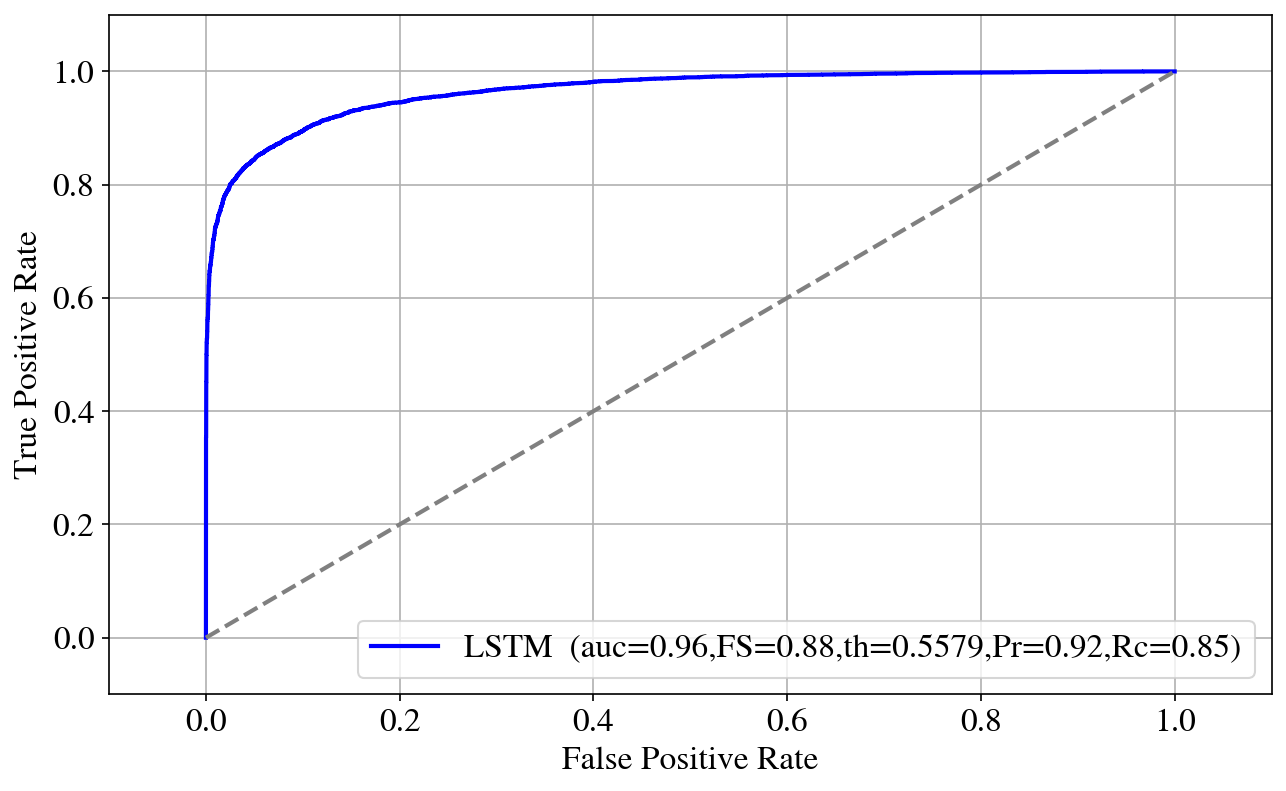

In [30]:
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
import numpy

thresholdsOptimum4GScoreFromCF = {}
label='LSTM '

fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_prob)
precision, recall, thresholdsROC = precision_recall_curve(y_true, y_prob)
    
GScoresTemp = np.sqrt(precision*recall)
FScoresTemp = (2*precision*recall)/(precision + recall)
    
Fnan=FScoresTemp
FScoresTemp=FScoresTemp[~numpy.isnan(FScoresTemp)]

indexSelectedThreshold = np.argmax(FScoresTemp)
#thresholdsOptimum4GScoreFromCF[label] = thresholdsROC[indexSelectedThreshold]
GScoreMax = GScoresTemp[indexSelectedThreshold]
FScoreMax = FScoresTemp[indexSelectedThreshold]
thresholdsGScoreMax = thresholdsROC[indexSelectedThreshold]
precisionGScoreMax = precision[indexSelectedThreshold]
recallGScoreMax = recall[indexSelectedThreshold]
    

roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr,
             color='b',
             linestyle='-',
             label='%s (auc=%0.2f,FS=%0.2f,th=%0.4f,Pr=%0.2f,Rc=%0.2f)' % (label, roc_auc, FScoreMax, thresholdsGScoreMax, 
                                                                           precisionGScoreMax, recallGScoreMax))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Confusion Matrix for LSTM with threshold 
0.5579175353050232


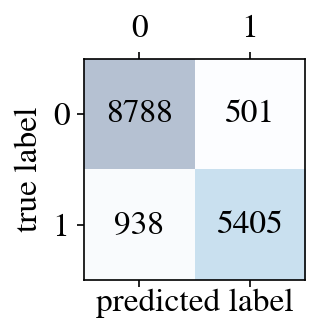

In [31]:

        
criticalThresholdGScoreMax =thresholdsGScoreMax
criticalThresholdGScoreMax = 1*criticalThresholdGScoreMax
       # criticalThresholdGScoreMax=0.4
print( "Confusion Matrix for " + label + "with threshold ")
print( criticalThresholdGScoreMax)

y_pred=y_prob.copy()

y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0

confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()


In [32]:
# output the prediction results on test set, includes features, y_true, y_pred,y_probability
df_prediction=pd.DataFrame()
df_prediction['y_true']=y_true
df_prediction['y_pred']=y_pred
df_prediction['y_prob']=y_prob
df_prediction['y_pred'] = df_prediction['y_pred'].map(lambda x:int(x))

In [33]:
matrix=df_prediction
tp=len(matrix[(matrix.y_pred==1)&(matrix.y_true==1)])
tn=len(matrix[(matrix.y_pred==0)&(matrix.y_true==0)])
fp=len(matrix[(matrix.y_pred==1)&(matrix.y_true==0)])
fn=len(matrix[(matrix.y_pred==0)&(matrix.y_true==1)])
precision=float(tp)/(tp+fp)
recall=float(tp)/(tp+fn)
gscore=math.sqrt(precision*recall)
fscore=(2*precision*recall)/(precision + recall)



print ('precision=' + str(float("{0:.2f}".format(precision)))+ ', '+'recall=' + str(float("{0:.2f}".format(recall)))+', '+'fscore=' + str(float("{0:.2f}".format(fscore)))) 


precision=0.92, recall=0.85, fscore=0.88


# prediction on train set

5862/1 - 0s


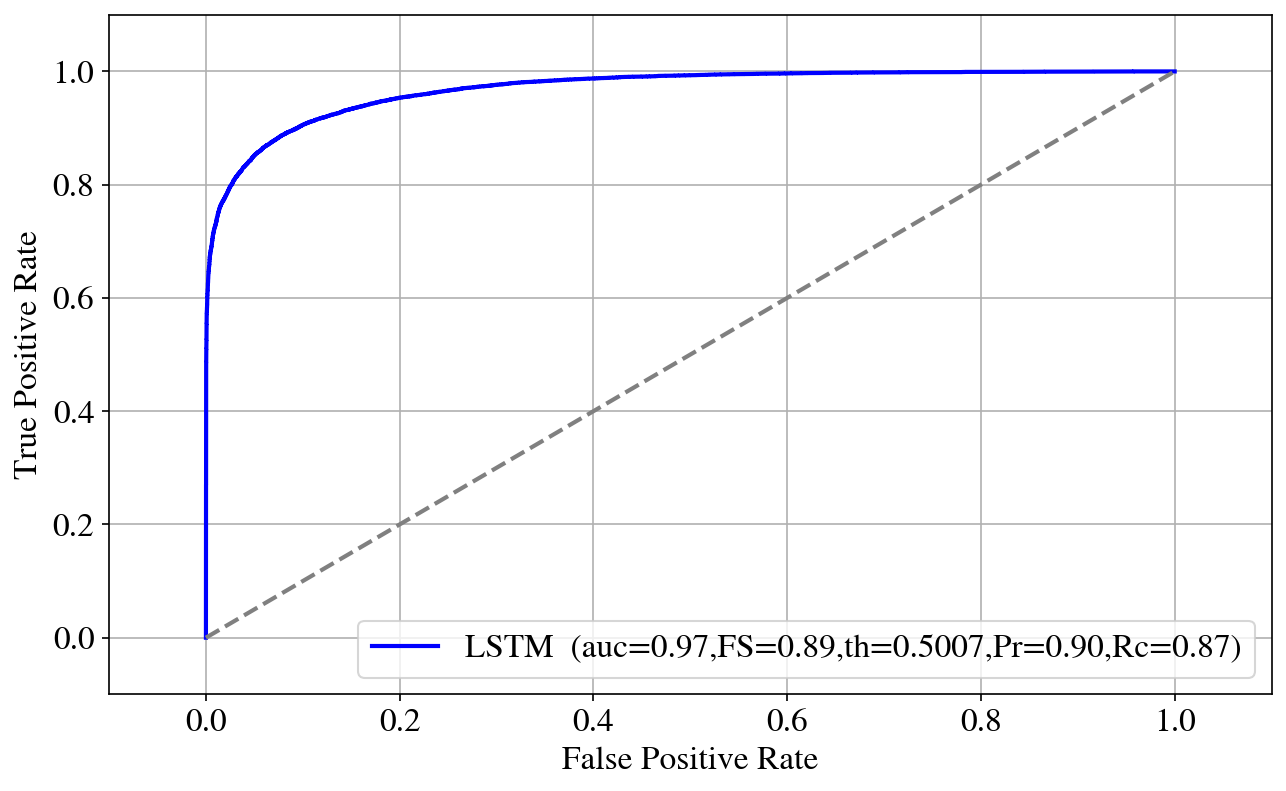

In [34]:
# on train set


x_input =X_train# x.reshape((1, 8, 103))
yhat = model.predict(x_input, verbose=2)

y_prob=yhat.flatten()
y_true=y_train.flatten()
        

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
import numpy

thresholdsOptimum4GScoreFromCF = {}
label='LSTM '

fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_prob)
precision, recall, thresholdsROC = precision_recall_curve(y_true, y_prob)
    
GScoresTemp = np.sqrt(precision*recall)
FScoresTemp = (2*precision*recall)/(precision + recall)
    
Fnan=FScoresTemp
FScoresTemp=FScoresTemp[~numpy.isnan(FScoresTemp)]

indexSelectedThreshold = np.argmax(FScoresTemp)
#thresholdsOptimum4GScoreFromCF[label] = thresholdsROC[indexSelectedThreshold]
GScoreMax = GScoresTemp[indexSelectedThreshold]
FScoreMax = FScoresTemp[indexSelectedThreshold]
thresholdsGScoreMax = thresholdsROC[indexSelectedThreshold]
precisionGScoreMax = precision[indexSelectedThreshold]
recallGScoreMax = recall[indexSelectedThreshold]
    

roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr,
             color='b',
             linestyle='-',
             label='%s (auc=%0.2f,FS=%0.2f,th=%0.4f,Pr=%0.2f,Rc=%0.2f)' % (label, roc_auc, FScoreMax, thresholdsGScoreMax, 
                                                                           precisionGScoreMax, recallGScoreMax))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
    
    
    
    
    
 

Confusion Matrix for LSTM with threshold 
0.5579175353050232


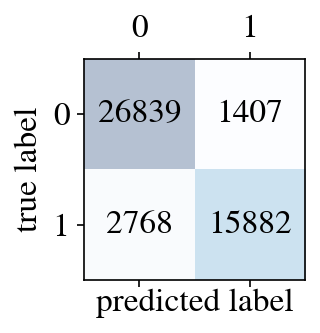

In [35]:
   
#criticalThresholdGScoreMax =thresholdsGScoreMax
#criticalThresholdGScoreMax = 1*criticalThresholdGScoreMax
       # criticalThresholdGScoreMax=0.4
print( "Confusion Matrix for " + label + "with threshold ")
print( criticalThresholdGScoreMax)

y_pred=y_prob.copy()

y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0

confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

# prediction on all data set

In [36]:
# on test  set

x_input =X_test
y_input = y_test

yhat = model.predict(x_input, verbose=2)
y_prob=yhat.flatten()
y_pred=y_prob.copy()
y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0
y_true=y_input.flatten()
y_pred_test=y_pred.copy()

# on train  set

x_input =X_train
y_input = y_train

yhat = model.predict(x_input, verbose=2)
y_prob=yhat.flatten()
y_pred=y_prob.copy()
y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0
y_true=y_input.flatten()
y_pred_train=y_pred.copy()


1954/1 - 0s
5862/1 - 0s


In [37]:
test_df = pd.DataFrame({'trackingID':test_index, 'GI_pred':y_pred_test} ) 
test_df=pd.merge(test_df,
                 df.loc[:,['trackingID','GI','strain','ID','anti','conc']], on = 'trackingID', how='left')

train_df = pd.DataFrame({'trackingID':train_index, 'GI_pred':y_pred_train} ) 
train_df=pd.merge(train_df,
                 df.loc[:,['trackingID','GI','strain','ID','anti','conc']], on = 'trackingID', how='left')

train_df['data_type']='train'
test_df['data_type']='test'

# EA 

In [38]:
growthThresh = 0.5

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import csv
import xlsxwriter
from tabulate import tabulate
import pandas as pd
from pprint import pprint

import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

from AST_Infer_Utils import *

In [40]:
#evaluation_df = pd.concat([test_df, train_df])
evaluation_df=test_df.copy()
#evaluation_df=train_df.copy()


In [41]:
resetInferDataDict()
yTruthAll = np.array([])
yPredAll = np.array([])
infoListAll=np.array([])


for index, row in evaluation_df.iterrows():
#    numFeatures = row[features]
    yTruth = row['GI']
    infoList = ['', 0, row['strain'], row['ID'], row['anti'], row['conc'], '0']
    
#    print(row['strain'])
    
    
    yPred = row['GI_pred']
    
    infoList = [infoList]
    
    yTruth = np.array(yTruth).reshape(1,1)
    yPred = np.array(yPred).reshape(1,1)

    
    
    if yTruthAll.size!=0:
        yTruthAll=np.concatenate([yTruthAll, yTruth], axis=0)
    else:
        yTruthAll=yTruth
    if yPredAll.size!=0:
        yPredAll=np.concatenate([yPredAll, yPred], axis=0)
    else:
        yPredAll=yPred
        
    if infoListAll.size!=0:
        infoListAll=np.concatenate([infoListAll, infoList], axis=0)
    else:
        infoListAll=np.array(infoList)

    addInferData(infoList, yTruth, yPred)
    
    
    
# not needed, this will be done in a later section
#groupCount, accAACount, accEACount, undetCount, strainSet, drugSet = compileAllInferData(growthThresh)


In [64]:
csvFileName = 'GramNeg_FullSample.csv'
# csvFileName = 'GramPos/GramPos_FullSample.csv'

dataDict = []
indMap = {}


with open(csvFileName, 'r') as csvFile:
    csvReader = csv.DictReader(csvFile)
    
    for n, line in enumerate(csvReader):            
        dataDict.append(line)
        indMap[int(line['Index'])] = n
        
dataDict[0]['data_type'] = ''
dataDict[0]['GI_pred'] = ''
        
print('totally %d valid examples' %len(dataDict))

totally 55613 valid examples


In [90]:
dataPath = 'C:/Users/Shaghayegh.kazemlou/Shay/Danaher/Microbiology/Files/Output/EA/'

predXLSXFileName = dataPath + 'LSTM-Model52-EA.xlsx'
workBook = xlsxwriter.Workbook(predXLSXFileName, {'strings_to_numbers': True, 'nan_inf_to_errors': True})

workSheet = workBook.add_worksheet('sample prediction')

workSheet.write_row(0, 0, dataDict[0].keys())
for n, row in enumerate(dataDict):
    workSheet.write_row(n+1, 0, row.values())

In [91]:
groupCount, accAACount, accEACount, undetCount, strainSet, drugSet = compileAllInferData(growthThresh)

groupCount = np.pad(groupCount, ((0,1),(0,1)), 'constant')
accAACount = np.pad(accAACount, ((0,1),(0,1)), 'constant')
accEACount = np.pad(accEACount, ((0,1),(0,1)), 'constant')
undetCount = np.pad(undetCount, ((0,1),(0,1)), 'constant')

!!! Undetermined MIC in labelled data: 55059, TOB !!!
!!! Undetermined MIC in labelled data: 55369, TOB !!!
!!! Undetermined MIC in labelled data: 55369, GM !!!


In [92]:

yPredBinaryAll = (yPredAll > growthThresh)

sampCount = np.zeros((25, 25))
errCount = np.zeros((25, 25))

bias0Cent = 10
sampCountByBias = np.zeros(bias0Cent*2 + 1)
errCountByBias = np.zeros(bias0Cent*2 + 1)

for (yt, yp, info) in zip(yTruthAll, yPredBinaryAll, infoListAll):
    
    if info[4] not in drugSet:
        drugSet.append(info[4])

    colInd = drugSet.index(info[4])

    if info[2] not in strainSet:
        strainSet.append(info[2])

    rowInd = strainSet.index(info[2])
    
#   wellBias = int(info[6])
#   biasInd = wellBias + bias0Cent

    sampCount[rowInd, colInd] += 1
#    sampCountByBias[biasInd] += 1

    if yp != yt:   
        errCount[rowInd, colInd] += 1    
#        errCountByBias[biasInd] += 1
    
sampCount = sampCount[0:len(strainSet)+1, 0:len(drugSet)+1]
errCount = errCount[0:len(strainSet)+1, 0:len(drugSet)+1]

#biasEff = np.where(sampCountByBias > 0)
#biasLow = np.min(biasEff)
#biasHigh = np.max(biasEff)+1
#biasRange = np.arange(biasLow-bias0Cent, biasHigh-bias0Cent)
#bias0Cent -= biasLow
#sampCountByBias = sampCountByBias[biasLow:biasHigh]
#errCountByBias = errCountByBias[biasLow:biasHigh]

In [93]:
sampCount[:,-1] = np.sum(sampCount, axis=1)
sampCount[-1,:] = np.sum(sampCount, axis=0)
errCount[:,-1] = np.sum(errCount, axis=1)
errCount[-1,:] = np.sum(errCount, axis=0)
groupCount[:,-1] = np.sum(groupCount, axis=1)
groupCount[-1,:] = np.sum(groupCount, axis=0)
accAACount[:,-1] = np.sum(accAACount, axis=1)
accAACount[-1,:] = np.sum(accAACount, axis=0)
accEACount[:,-1] = np.sum(accEACount, axis=1)
accEACount[-1,:] = np.sum(accEACount, axis=0)
undetCount[:,-1] = np.sum(undetCount, axis=1)
undetCount[-1,:] = np.sum(undetCount, axis=0)

In [94]:
tableHeader = list([''] + drugSet)
tableDataCount = []
tableDataGroupCount = []
tableDataAcc = []
tableDataAccAA = []
tableDataAccEA = []
tableDataUndet = []

sampCount = sampCount.astype(int)
groupCount = groupCount.astype(int)
accRate = np.round((1 - errCount / sampCount) * 100, decimals=1)
accAARate = np.round((accAACount / groupCount) * 100, decimals=1)
accEARate = np.round((accEACount / groupCount) * 100, decimals=1)

for n, strain in enumerate(strainSet):
    tableDataCount.append([strainSet[n][0:6]] + list(sampCount[n]))
    tableDataGroupCount.append([strainSet[n][0:6]] + list(groupCount[n]))
    tableDataAcc.append([strainSet[n][0:6]] + list(accRate[n]))
    tableDataAccAA.append([strainSet[n][0:6]] + list(accAARate[n]))
    tableDataAccEA.append([strainSet[n][0:6]] + list(accEARate[n]))
    tableDataUndet.append([strainSet[n][0:6]] + list(undetCount[n]))

tableDataCount.append(['SUM'] + list(sampCount[-1,:]))
tableDataGroupCount.append(['SUM'] + list(groupCount[-1,:]))
tableDataAcc.append(['MEAN'] + list(accRate[-1,:]))
tableDataAccAA.append(['MEAN'] + list(accAARate[-1,:]))
tableDataAccEA.append(['MEAN'] + list(accEARate[-1,:]))
tableDataUndet.append(['SUM'] + list(undetCount[-1,:]))

sampCountTable = tabulate(tableDataCount, headers=tableHeader+['SUM'], tablefmt="pretty")
groupCountTable = tabulate(tableDataGroupCount, headers=tableHeader+['SUM'], tablefmt="pretty")
accRateTable = tabulate(tableDataAcc, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
accAARateTable = tabulate(tableDataAccAA, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
accEARateTable = tabulate(tableDataAccEA, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
undetCountTable = tabulate(tableDataUndet, headers=tableHeader+['SUM'], tablefmt="pretty")

print('example count by species & drug groups')
print(sampCountTable)
print()
print('dilution group count by species & drug groups')
print(groupCountTable)
print()
print('G/I accuracy in % by species & drug groups')
print(accRateTable)
print()
print('AA accuracy in % by species & drug groups')
print(accAARateTable)
print()
print('EA accuracy in % by species & drug groups')
print(accEARateTable)
print()
print('undeter in % by species & drug groups')
print(undetCountTable)

# plt.figure(figsize=(12,8))
# sn.heatmap(accRate, annot=True, square=False)
# plt.title('accuracy in % by species & drug groups')

example count by species & drug groups
+--------+------+------+------+----+------+------+------+----+------+------+------+------+-------+
|        |  GM  | TOB  | CPFX | AS | LVFX | IPM  | MEPM | ST | CAZ  | CTX  | CFPM |  TP  |  SUM  |
+--------+------+------+------+----+------+------+------+----+------+------+------+------+-------+
| E.COLI | 208  | 192  | 160  | 0  | 320  | 160  | 136  | 0  | 304  | 128  | 288  | 160  | 2056  |
| K.OXYT | 104  | 144  | 120  | 0  |  80  |  80  |  96  | 0  | 104  |  80  | 112  |  80  | 1000  |
| S.MARC | 128  |  96  | 104  | 0  | 128  |  96  |  96  | 0  | 120  | 152  | 128  |  88  | 1136  |
| P.VULG | 104  |  96  | 128  | 0  |  72  | 120  | 120  | 0  | 128  |  96  | 128  |  80  | 1072  |
| A.BAUM | 144  | 136  | 136  | 0  | 200  | 152  | 136  | 0  | 128  | 152  | 176  | 136  | 1496  |
| E.AERO | 104  |  80  | 160  | 0  |  96  | 112  | 112  | 0  |  96  | 128  |  72  | 128  | 1088  |
| C.FREU | 112  |  96  | 120  | 0  | 112  |  96  | 112  | 0  | 104  | 

In [95]:
workSheet = workBook.add_worksheet('sample count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataCount):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('dilution group count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataGroupCount):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAcc):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('AA accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAccAA):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('EA accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAccEA):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('undertermined count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataUndet):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workBook.close()